<img src="./logo_UTN.svg" align="right" width="150" /> 


<br><br>
#### Procesamiento Digital de Señales

# Trabajo Práctico Nº3
#### Alumno:    Fernando Daniel Fiamberti

# <span style="color:Blue">Introducción</span>
###  Estimación de Amplitud y Frecuencia de una Señal
 
# <span style="color:Blue">Enunciado</span>
### Consignas para la generación de la señal

Comenzaremos con la generación de la siguiente señal:

$x(n) = a_0 \cdot \sin(\Omega_1 \cdot n) + n_a(n)$

siendo

$\Omega_1 = \Omega_0 + f_r \cdot \frac{2 \pi}{N}$

$\Omega_0 = \frac{\pi}{2}$

siendo la variable aleatoria definida por la siguiente distribución de probabilidad

$f_r \sim U(-2, 2)$

$n_a \sim N(0, \sigma^2)$



### Diseño de estimadores

Diseñe los siguientes estimadores de amplitud $a_1$:

$\hat{a}_1^i = |X_i^w(\Omega_0)| = \left| \mathcal{F} \{ x(n) \cdot w_i(n) \} \right|$

para la i-ésima realización y la w-ésima ventana (ver detalles debajo).

Y de frecuencia  
$\Omega_1$:

Omegâ₁ⁱ = arg max_Ω |Xᵢʷ(Ω)|


para cada una de las ventanas:


- rectangular (sin ventana)
- flattop
- blackmanharris
- otra que elija de scipy.signal.windows


### Consignas para la experimentación

- Considere 200 realizaciones (muestras tomadas de $f_r$) de 1000 muestras para cada experimento.
- Parametrice para SNR's de 3 y 10 dB (Ayuda: calibre $a_0$ para que la potencia de la senoidal sea 1 W).

---

### Se pide

1. Realizar una tabla por cada SNR, que describa el sesgo y la varianza de cada estimador para cada ventana analizada. Recuerde incluir las ventanas rectangular (sin ventana), flattop y blackmanharris y otras que considere.


### Estimación de Amplitud

| Ventana      | Sesgo (sa) | Varianza (va) |
|--------------|------------|---------------|
| Rectangular  |            |               |
| Flat-top     |            |               |
| Blackman     |            |               |
| Otras        |            |               |


### Estimación de Frecuencia

| Ventana      | Sesgo (sa) | Varianza (va) |
|--------------|------------|---------------|
| Rectangular  |            |               |
| Flat-top     |            |               |
| Blackman     |            |               |
| Otras        |            |               |


### Ayuda para cálculo de sesgo y varianza

Puede calcular experimentalmente el sesgo y la varianza de un estimador:

$\hat{a}_0 = |X_i^w(\Omega_0)|$

siendo

$sa = E\{\hat{a}_0\} - a_0$

$va = \mathrm{var}\{\hat{a}_0\} = E \{ (\hat{a}_0 - E\{\hat{a}_0\})^2 \}$

y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales:

E{â₀} = μₐ = (1/M) * Σⱼ₌₀^{M−1} âⱼ


$sa = \mu_{\hat{a}} - a_0$

$va = \frac{1}{M} \sum_{j=0}^{M-1} (a_j^ - \mu_{\hat{a}})^2$


### Bonus

- Analice el efecto del zero-padding para el estimador $\hat{\Omega}_1$.
- Proponga estimadores alternativos para frecuencia y amplitud de la senoidal y repita el experimento.



# Desarrollo de la tarea

### <span style="color:Blue">Código implementado:</span>



=== Resultados de Amplitud ===
   SNR_dB         Ventana     Sesgo  Varianza     Media
0       3     rectangular -0.188980  0.022154  1.225233
1       3         flattop -1.109841  0.000173  0.304372
2       3  blackmanharris -0.923365  0.000399  0.490848
3       3            hann -0.745142  0.001207  0.669072
4      10     rectangular -0.175142  0.024564  1.239072
5      10         flattop -1.108995  0.000040  0.305219
6      10  blackmanharris -0.921586  0.000289  0.492628
7      10            hann -0.742180  0.001212  0.672033

=== Resultados de Frecuencia ===
   SNR_dB         Ventana     Sesgo  Varianza
0       3     rectangular  0.000057  0.000003
1       3         flattop -0.000163  0.000009
2       3  blackmanharris  0.000120  0.000004
3       3            hann  0.000120  0.000003
4      10     rectangular -0.000033  0.000003
5      10         flattop  0.000124  0.000004
6      10  blackmanharris -0.000033  0.000003
7      10            hann -0.000033  0.000003


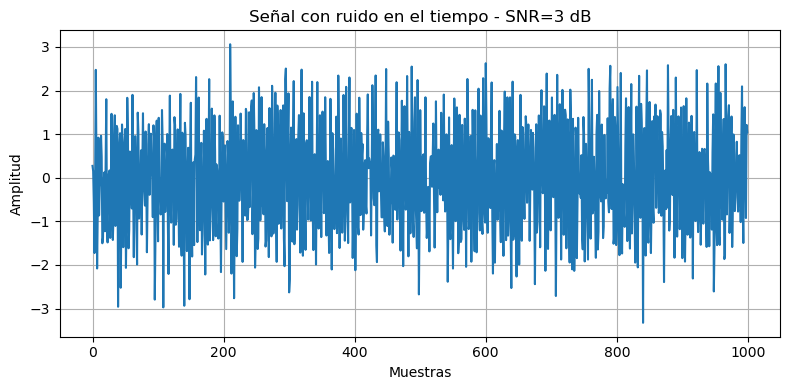

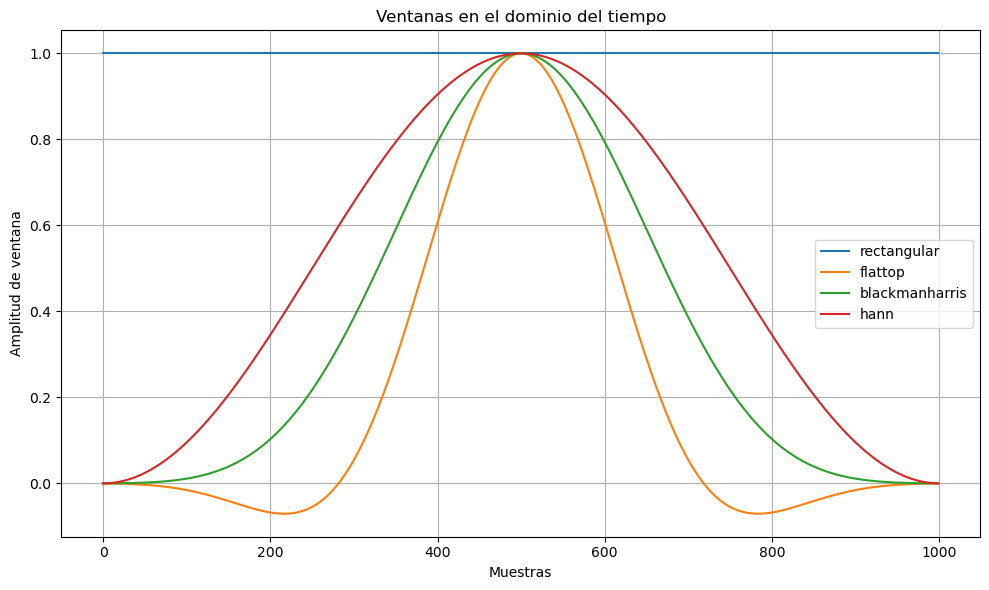

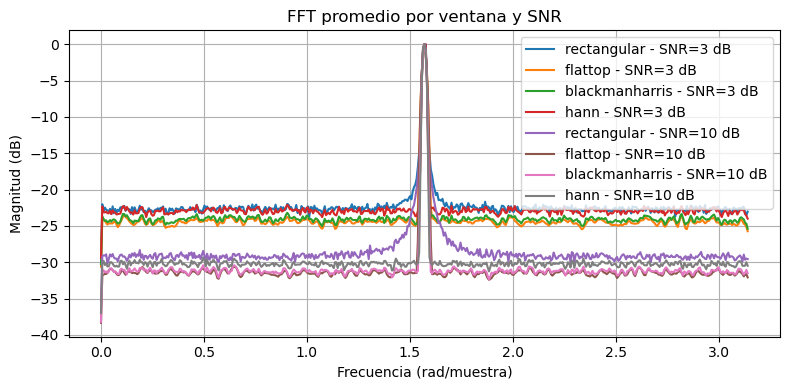

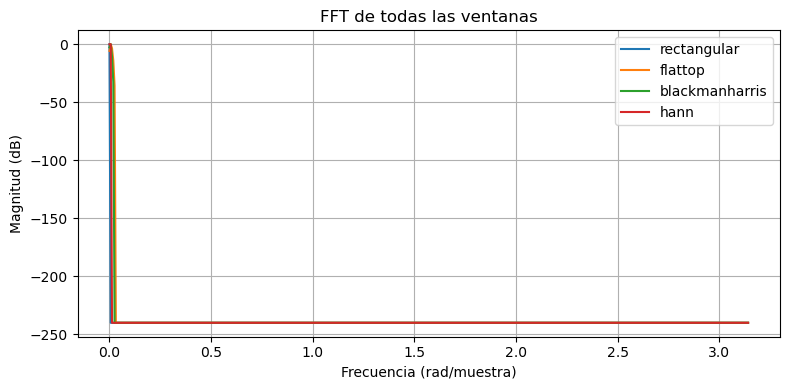

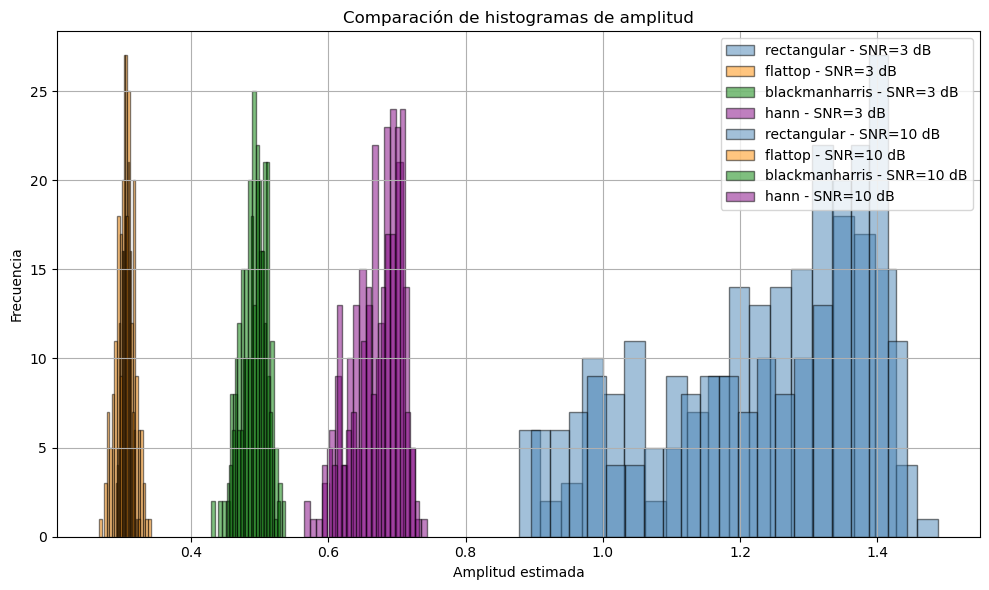

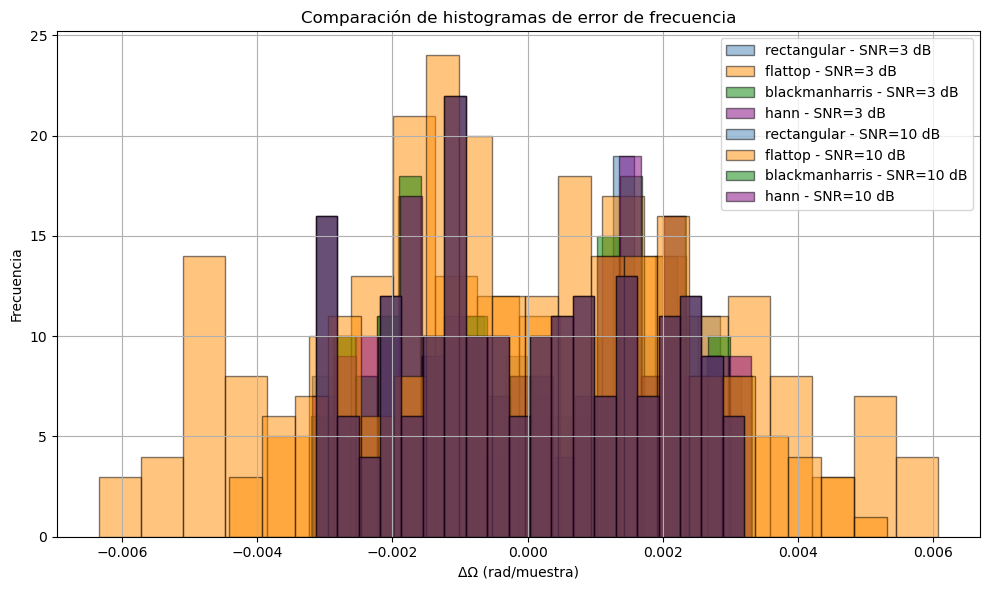


=== Resultados de Amplitud Bonus ===
   SNR_dB         Ventana     Sesgo  Varianza     Media
0       3     rectangular -0.770256  0.004054  0.643957
1       3         flattop -1.122442  0.000214  0.291772
2       3  blackmanharris -1.022737  0.000223  0.391477
3       3            hann -0.953607  0.000298  0.460607
4      10     rectangular -0.785482  0.004336  0.628732
5      10         flattop -1.119424  0.000056  0.294789
6      10  blackmanharris -1.021674  0.000106  0.392540
7      10            hann -0.952493  0.000172  0.461721

=== Resultados de Frecuencia Bonus Zero-Padding ===
   SNR_dB         Ventana     Sesgo      Varianza
0       3     rectangular -0.000010  5.824012e-08
1       3         flattop -0.000422  9.034903e-06
2       3  blackmanharris -0.000010  8.584532e-08
3       3            hann -0.000021  6.587924e-08
4      10     rectangular -0.000001  5.318620e-08
5      10         flattop  0.000109  5.723730e-06
6      10  blackmanharris  0.000003  5.517838e-08
7    

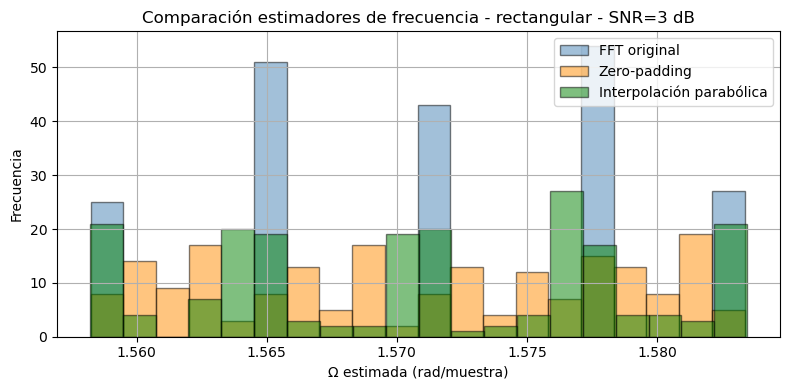

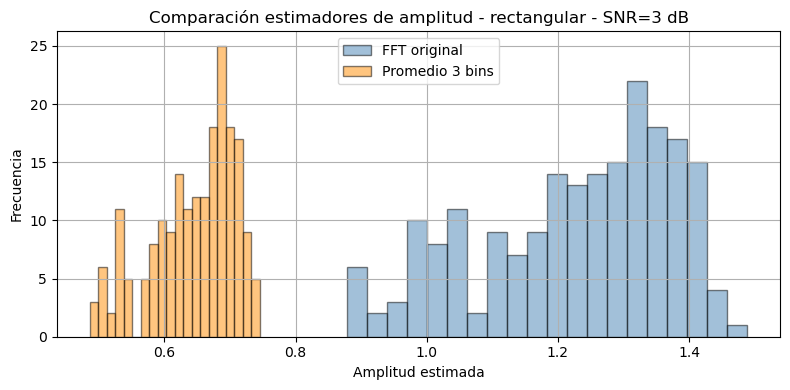

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Estimación de Amplitud y Frecuencia de una Señal

Created on Tue Sep 30 08:00:33 2025

@author: Fernando Daniel Fiamberti
"""

# ----------------------------
# IMPORTACIÓN DE LIBRERÍAS
# ----------------------------
import numpy as np  # Librería para cálculos numéricos y manejo de arrays
from scipy.signal import windows  # Librería para generación de ventanas de señales
import matplotlib.pyplot as plt  # Librería para gráficos
import pandas as pd  # Librería para manejo de datos en tablas (DataFrame)

# ----------------------------
# PARÁMETROS GENERALES DEL EXPERIMENTO
# ----------------------------
N = 1000          # Número de muestras por señal
R = 200           # Número de realizaciones por SNR
Ω0 = np.pi / 2    # Frecuencia central de la señal senoidal en rad/muestra
a0 = np.sqrt(2.0) # Amplitud calibrada para que la potencia sea 1 W
k0 = int(round(N*(Ω0/(2*np.pi))))  # Índice FFT correspondiente a Ω0

# Ventanas a evaluar en el análisis
W_names = np.array(["rectangular","flattop","blackmanharris","hann"])
W = np.stack([
    np.ones(N),  # Ventana rectangular
    windows.flattop(N, sym=False),  # Ventana flattop
    windows.blackmanharris(N, sym=False),  # Ventana Blackman-Harris
    windows.hann(N, sym=False)  # Ventana Hann
])

# Lista de SNR (Signal-to-Noise Ratio) a evaluar
snr_list = np.array([3, 10])

# Colores para graficar diferentes ventanas
colors = ["steelblue","darkorange","green","purple"]

# ----------------------------
# FUNCIÓN FFT
# ----------------------------
def fft(x):
    Nloc = x.shape[1]  # Número de muestras en cada señal
    X = np.fft.fft(x, axis=1)  # FFT de cada señal
    X_mag = np.abs(X)/Nloc  # Magnitud normalizada
    X_mag[:,1:-1]*=2  # Duplicar amplitud para bins intermedios (excepto DC y Nyquist)
    X_mag = X_mag[:,:Nloc//2+1]  # Tomar solo mitad positiva del espectro
    freqs = 2*np.pi*np.arange(X_mag.shape[1])/Nloc  # Vector de frecuencias en rad/muestra
    return freqs, X_mag

# ----------------------------
# GENERACIÓN DE SEÑALES Y RUIDO
# ----------------------------
var_signal = 1.0  # Varianza de la señal
var_noise = var_signal / (10**(snr_list/10))  # Varianza del ruido según SNR
sigma_noise = np.sqrt(var_noise)  # Desviación estándar del ruido

fr = np.random.uniform(-2.0, 2.0, (len(snr_list), R))  # Desviación aleatoria de frecuencia
Ω1_array = Ω0 + fr*(2*np.pi/N)  # Frecuencias de cada realización
n = np.arange(N)  # Vector de tiempo discreto
ruido = np.random.normal(0.0,1.0,(len(snr_list), R, N)) * sigma_noise[:, None, None]  # Ruido gaussiano
x_clean = a0*np.sin(Ω1_array[:,:,None]*n)  # Señales senoidales limpias
x_noisy = x_clean + ruido  # Señales con ruido agregado

# ----------------------------
# APLICACIÓN DE VENTANAS
# ----------------------------
xw = x_noisy[:, None, :, :] * W[None, :, None, :]  # Aplicar cada ventana a cada señal

# ----------------------------
# CÁLCULO DE FFT
# ----------------------------
freqs, Xmag = fft(xw.reshape(-1,N))  # FFT de todas las señales
Xmag = Xmag.reshape(len(snr_list), len(W), R, -1)  # Reestructurar array para separar SNR y ventana

# ----------------------------
# ESTIMACIÓN DE AMPLITUD Y FRECUENCIA (MEJORADA)
# ----------------------------
k1_array = np.round(Ω1_array * N / (2*np.pi)).astype(int)  # Índices de frecuencia teóricos
a_hats = np.take_along_axis(Xmag, k1_array[:, None, :, None], axis=3).squeeze(axis=3)  # Estimación de amplitud
k_hats = np.argmax(Xmag, axis=3)  # Índice del máximo de FFT (frecuencia estimada)
Omega_hats = freqs[k_hats]  # Frecuencia estimada en rad/muestra

mean_a_hat = np.mean(a_hats, axis=2)  # Promedio de amplitudes estimadas
bias_a = mean_a_hat - a0  # Sesgo de amplitud
var_a = np.mean((a_hats - mean_a_hat[:,:,None])**2, axis=2)  # Varianza de amplitud

delta_Omega = Omega_hats - Ω1_array[:,None,:]  # Error en frecuencia
mean_delta = np.mean(delta_Omega, axis=2)  # Promedio de error en frecuencia
var_delta = np.mean((delta_Omega - mean_delta[:,:,None])**2, axis=2)  # Varianza del error

# ----------------------------
# CREACIÓN DE TABLAS DE RESULTADOS
# ----------------------------
resultados_amp = pd.DataFrame({
    "SNR_dB": np.repeat(snr_list, len(W)),
    "Ventana": np.tile(W_names, len(snr_list)),
    "Sesgo": bias_a.ravel(),
    "Varianza": var_a.ravel(),
    "Media": mean_a_hat.ravel()
})  # Tabla de amplitud

resultados_freq = pd.DataFrame({
    "SNR_dB": np.repeat(snr_list, len(W)),
    "Ventana": np.tile(W_names, len(snr_list)),
    "Sesgo": mean_delta.ravel(),
    "Varianza": var_delta.ravel()
})  # Tabla de frecuencia

# Guardar resultados en CSV
resultados_amp.to_csv("resultados_amplitud.csv", index=False)
resultados_freq.to_csv("resultados_frecuencia.csv", index=False)

# Mostrar resultados en pantalla
print("\n=== Resultados de Amplitud ===")
print(resultados_amp)
print("\n=== Resultados de Frecuencia ===")
print(resultados_freq)

# ----------------------------
# GRAFICOS BASE
# ----------------------------
plt.figure(figsize=(8,4))
plt.plot(n, x_noisy[0,0])
plt.title(f"Señal con ruido en el tiempo - SNR={snr_list[0]} dB")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10,6))
[plt.plot(n, W[i], label=f"{W_names[i]}") for i in range(len(W))]
plt.title("Ventanas en el dominio del tiempo")
plt.xlabel("Muestras")
plt.ylabel("Amplitud de ventana")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

fft_mean = np.mean(Xmag, axis=2)
plt.figure(figsize=(8,4))
eps = 1e-12
[plt.plot(freqs, 20*np.log10(fft_mean[idx_snr, idx_w]/np.max(fft_mean[idx_snr, idx_w]) + eps),
         label=f"{W_names[idx_w]} - SNR={snr_list[idx_snr]} dB")
 for idx_snr in range(len(snr_list)) for idx_w in range(len(W_names))]
plt.title("FFT promedio por ventana y SNR")
plt.xlabel("Frecuencia (rad/muestra)")
plt.ylabel("Magnitud (dB)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

freqs_win = 2*np.pi*np.arange(N//2+1)/N
fft_win_mag = np.abs(np.fft.fft(W, n=N, axis=1))/N
fft_win_mag[:,1:-1]*=2
fft_win_mag = fft_win_mag[:,:N//2+1]
plt.figure(figsize=(8,4))
eps = 1e-12
[plt.plot(freqs_win, 20*np.log10(fft_win_mag[i]/np.max(fft_win_mag[i]) + eps), label=W_names[i])
 for i in range(len(W_names))]
plt.title("FFT de todas las ventanas")
plt.xlabel("Frecuencia (rad/muestra)")
plt.ylabel("Magnitud (dB)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

hist_bins_a = np.linspace(a_hats.min(), a_hats.max(), 21)
hist_bins_delta = np.linspace(delta_Omega.min(), delta_Omega.max(), 21)

plt.figure(figsize=(10,6))
[plt.hist(a_hats[idx_snr,i], bins=20, alpha=0.5, color=colors[i],
          label=f"{W_names[i]} - SNR={snr_list[idx_snr]} dB", edgecolor='black')
 for idx_snr in range(len(snr_list)) for i in range(len(W))]
plt.title("Comparación de histogramas de amplitud")
plt.xlabel("Amplitud estimada")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10,6))
[plt.hist(delta_Omega[idx_snr,i], bins=20, alpha=0.5, color=colors[i],
          label=f"{W_names[i]} - SNR={snr_list[idx_snr]} dB", edgecolor='black')
 for idx_snr in range(len(snr_list)) for i in range(len(W))]
plt.title("Comparación de histogramas de error de frecuencia")
plt.xlabel("ΔΩ (rad/muestra)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

# ----------------------------
# BONUS: ZERO-PADDING Y ESTIMADORES ALTERNATIVOS (CORREGIDO)
# ----------------------------
N_pad = 8*N
xw_padded = np.zeros((len(snr_list), len(W), R, N_pad))
xw_padded[:,:,:,:N] = xw
freqs_zp, Xmag_zp = fft(xw_padded.reshape(-1, N_pad))
Xmag_zp = Xmag_zp.reshape(len(snr_list), len(W), R, -1)
k_hats_zp = np.argmax(Xmag_zp, axis=3)
Omega_hats_zp = 2*np.pi*np.arange(Xmag_zp.shape[3])/N_pad
Omega_hats_zp = Omega_hats_zp[k_hats_zp]

k_prev = np.clip(k_hats-1, 0, Xmag.shape[3]-1)
k_curr = k_hats
k_next = np.clip(k_hats+1, 0, Xmag.shape[3]-1)
a_bins = np.stack([
    np.take_along_axis(Xmag, k_prev[:,:,:,None], axis=3),
    np.take_along_axis(Xmag, k_curr[:,:,:,None], axis=3),
    np.take_along_axis(Xmag, k_next[:,:,:,None], axis=3)
], axis=4)
a_hats_alt = np.mean(a_bins, axis=4).squeeze(axis=3)

alpha = np.take_along_axis(Xmag, k_prev[:,:,:,None], axis=3)[...,0]
beta = np.take_along_axis(Xmag, k_curr[:,:,:,None], axis=3)[...,0]
gamma = np.take_along_axis(Xmag, k_next[:,:,:,None], axis=3)[...,0]
delta = 0.5*(alpha - gamma)/(alpha - 2*beta + gamma)
delta = np.nan_to_num(delta)
Omega_hats_parab = 2*np.pi*(k_hats + delta)/N

mean_a_hat_alt = np.mean(a_hats_alt, axis=2)
bias_a_alt = mean_a_hat_alt - a0
var_a_alt = np.mean((a_hats_alt - mean_a_hat_alt[:,:,None])**2, axis=2)
resultados_amp_alt = pd.DataFrame({
    "SNR_dB": np.repeat(snr_list, len(W)),
    "Ventana": np.tile(W_names, len(snr_list)),
    "Sesgo": bias_a_alt.ravel(),
    "Varianza": var_a_alt.ravel(),
    "Media": mean_a_hat_alt.ravel()
})
resultados_amp_alt.to_csv("resultados_amplitud_bonus.csv", index=False)
print("\n=== Resultados de Amplitud Bonus ===")
print(resultados_amp_alt)

delta_Omega_zp = Omega_hats_zp - Ω1_array[:,None,:]
mean_delta_zp = np.mean(delta_Omega_zp, axis=2)
var_delta_zp = np.mean((delta_Omega_zp - mean_delta_zp[:,:,None])**2, axis=2)
resultados_freq_zp = pd.DataFrame({
    "SNR_dB": np.repeat(snr_list, len(W)),
    "Ventana": np.tile(W_names, len(snr_list)),
    "Sesgo": mean_delta_zp.ravel(),
    "Varianza": var_delta_zp.ravel()
})
resultados_freq_zp.to_csv("resultados_frecuencia_bonus_zeropad.csv", index=False)
print("\n=== Resultados de Frecuencia Bonus Zero-Padding ===")
print(resultados_freq_zp)

delta_Omega_parab = Omega_hats_parab - Ω1_array[:,None,:]
mean_delta_parab = np.mean(delta_Omega_parab, axis=2)
var_delta_parab = np.mean((delta_Omega_parab - mean_delta_parab[:,:,None])**2, axis=2)
resultados_freq_parab = pd.DataFrame({
    "SNR_dB": np.repeat(snr_list, len(W)),
    "Ventana": np.tile(W_names, len(snr_list)),
    "Sesgo": mean_delta_parab.ravel(),
    "Varianza": var_delta_parab.ravel()
})
resultados_freq_parab.to_csv("resultados_frecuencia_bonus_parab.csv", index=False)
print("\n=== Resultados de Frecuencia Bonus Interpolación Parabólica ===")
print(resultados_freq_parab)

plt.figure(figsize=(8,4))
plt.hist(Omega_hats[0,0], bins=20, alpha=0.5, label="FFT original", color="steelblue", edgecolor='black')
plt.hist(Omega_hats_zp[0,0], bins=20, alpha=0.5, label="Zero-padding", color="darkorange", edgecolor='black')
plt.hist(Omega_hats_parab[0,0], bins=20, alpha=0.5, label="Interpolación parabólica", color="green", edgecolor='black')
plt.title(f"Comparación estimadores de frecuencia - {W_names[0]} - SNR={snr_list[0]} dB")
plt.xlabel("Ω estimada (rad/muestra)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(8,4))
plt.hist(a_hats[0,0], bins=20, alpha=0.5, label="FFT original", color="steelblue", edgecolor='black')
plt.hist(a_hats_alt[0,0], bins=20, alpha=0.5, label="Promedio 3 bins", color="darkorange", edgecolor='black')
plt.title(f"Comparación estimadores de amplitud - {W_names[0]} - SNR={snr_list[0]} dB")
plt.xlabel("Amplitud estimada")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()


# Informe de los experimentos realizados

## 1.1. Qué es un estimador
Un **estimador** permite inferir parámetros desconocidos de la señal (como amplitud o frecuencia) a partir de datos ruidosos.  
**Amplitud:** $\hat{a}_1^i = |X_i^w(\Omega_0)|$  
**Frecuencia:** $\hat{\Omega}_1^i = \arg\max_\Omega |X_i^w(\Omega)|$

## 1.2. Sesgo y varianza
- **Sesgo (bias):** diferencia entre el promedio del estimador y el valor verdadero del parámetro. Permite establecer exactitud.  
- **Varianza:** dispersión de las estimaciones alrededor de su promedio. Permite establecer precisión.  
- **Importancia:** un estimador ideal tiene bajo sesgo y baja varianza; ambos indicadores ayudan a evaluar robustez frente a ruido y *leakage*.  

---

## 1.3. Análisis de los gráficos y resultados experimentales

### 1.3.1. Gráfico *FFT promedio por ventana y SNR*
El gráfico muestra el **espectro promedio** de las realizaciones simuladas para cada ventana, considerando dos niveles de SNR (3 dB y 10 dB). Permite analizar cómo la forma de la ventana y el nivel de ruido influyen en la estimación de amplitud y frecuencia de la señal.

- **Interpretación conceptual:**
  - El **pico principal** representa la frecuencia de la señal senoidal. Su altura indica la magnitud promedio de la señal.  
  - Los **lóbulos laterales** se producen por la dispersión espectral causada por *leakage* de la ventana.  
  - El **ancho del pico** determina la precisión que se puede alcanzar al localizar la frecuencia máxima. Picos más estrechos permiten mayor exactitud en frecuencia; picos más anchos reducen sesgo en la amplitud.  

- **Observaciones según ventana:**
  - **Rectangular:** pico estrecho, lóbulos altos → *leakage* significativo; amplitud subestimada y frecuencia sensible al ruido.  
  - **Flattop:** pico ancho y plano, lóbulos atenuados → excelente para medición de amplitud, menor sesgo; peor precisión en frecuencia.  
  - **Blackman-Harris:** equilibrio entre altura del pico y reducción de lóbulos → buena precisión de frecuencia y amplitud moderada.  
  - **Hann:** suaviza los bordes, compromiso entre sesgo de amplitud y precisión de frecuencia.  

- **Efecto del SNR:**  
  - **SNR alto (10 dB):** espectros concentrados, pico definido, menor dispersión → menor varianza en estimaciones.  
  - **SNR bajo (3 dB):** espectros más ruidosos, pico menos definido, mayor dispersión → mayor varianza y riesgo de error en frecuencia.  

**Conclusión:** La ventana determina el **compromiso entre sesgo y resolución**; la SNR regula la **precisión estadística** de la estimación.

---

### 1.3.2. Histogramas de amplitud
Estos gráficos muestran la **distribución de las estimaciones de amplitud** de todas las realizaciones para cada ventana y nivel de SNR. Permiten evaluar cómo el *leakage* y el ruido afectan la confiabilidad de las mediciones.

- **Qué se observa:**
  - La **anchura del histograma** indica la varianza del estimador: más ancho → mayor dispersión de las estimaciones.  
  - La **desviación del valor central respecto al valor real** indica el sesgo del estimador.  
  - La forma de la distribución refleja sensibilidad al ruido y cuantización espectral.  

- **Observaciones según ventana:**
  - **Rectangular:** histograma ancho, desplazado del valor real → alto sesgo y varianza.  
  - **Flattop:** histograma centrado, relativamente estrecho → bajo sesgo, varianza moderada.  
  - **Blackman-Harris y Hann:** histograma intermedio, equilibrando sesgo y varianza.  

- **Efecto del SNR:**  
  - **SNR bajo:** distribuciones más dispersas → varianza alta, menos confiabilidad.  
  - **SNR alto:** distribuciones concentradas → estimaciones más confiables.  

**Conclusión:** La ventana es el factor crítico en **sesgo de amplitud**, mientras que la SNR domina la **varianza**.

---

### 1.3.3. Histogramas de error de frecuencia
Estos gráficos muestran la **distribución de $\Delta \Omega = \Omega_{\text{estimada}} - \Omega_0$**, permitiendo evaluar la precisión y exactitud de los estimadores de frecuencia para cada ventana y SNR.

- **Qué se observa:**
  - El **ancho de la distribución** indica varianza del estimador de frecuencia.  
  - La **posicion central respecto a cero** indica el sesgo del estimador.  
  - Distribuciones simétricas y estrechas indican estimaciones precisas y robustas frente a ruido y *leakage*.  

- **Observaciones según ventana:**
  - **Rectangular:** amplia dispersión, alta probabilidad de error, sensible al ruido.  
  - **Flattop:** pico ancho → peor localización del máximo, errores mayores.  
  - **Blackman-Harris:** distribuciones estrechas, centradas → buena precisión y bajo sesgo.  
  - **Hann:** distribución balanceada, menor varianza que rectangular.  

- **Efecto de la SNR:**  
  - **SNR alto:** histogramas estrechos, estimaciones confiables.  
  - **SNR bajo:** histogramas anchos, mayor dispersión y riesgo de error.  

**Conclusión:** Para la frecuencia, la **elección de la ventana** es más crítica que para la amplitud; Blackman-Harris y Hann ofrecen la mejor combinación de precisión y exactitud.

---

### 1.3.4. Estimadores alternativos y zero-padding
Se analizan otros métodos de estimación de amplitud y frecuencia, comparando resultados con la FFT.

- **Amplitud (promedio de 3 bins alrededor del pico):**  
  - Reduce sensibilidad al *leakage* y errores de cuantización.  
  - Histogramas más centrados y estrechos → menor varianza y sesgo.  

- **Frecuencia (zero-padding e interpolación parabólica):**  
  - **Zero-padding:** aumenta resolución espectral sin modificar amplitud, permitiendo localizar el pico con mayor precisión.  
  - **Interpolación parabólica:** ajusta el máximo dentro del bin → disminuye sesgo y varianza, mejorando la estimación de frecuencia.  

**Conclusión:** Los estimadores alternativos y el zero-padding mejoran la confiabilidad de mediciones de amplitud y frecuencia en presencia de ruido y *leakage*. La combinación de zero-padding y estimador parabólico permite maximizar **precisión (varianza baja)** y **exactitud (sesgo bajo)**, especialmente en señales ruidosas o con ventanas de pico ancho.

---

## 1.4. Efecto de la ventana sobre la estimación de amplitud
- Multiplicar la señal por una ventana controla el *leakage* espectral. Diferentes ventanas atenúan los bordes de forma distinta, afectando precisión de amplitud.  
- **Qué se obtiene:**
  - **Rectangular:** sesgo alto, lóbulos laterales grandes → energía dispersa.  
  - **Flattop:** sesgo casi cero, pico ancho → ideal para medición de amplitud.  
  - **Blackman-Harris:** compromiso entre reducción de lóbulos y ancho de pico; sesgo moderado, varianza baja.  
  - **Hann:** suaviza señal, reduce *leakage*, sesgo intermedio.  
- **Qué se espera:** mediciones cercanas a $a_0$, dispersión y sesgo dependen de la ventana.

## 1.5. Efecto de la ventana sobre la estimación de frecuencia
- Las ventanas afectan el ancho del pico espectral; picos más anchos dificultan localizar la frecuencia exacta con *argmax*.  
- **Qué se obtiene:**
  - **Rectangular:** pico estrecho pero lóbulos altos; errores con ruido.  
  - **Flattop:** ancho de pico mayor → frecuencia menos precisa.  
  - **Blackman-Harris:** equilibrio → frecuencia más precisa.  
  - **Hann:** buena precisión, sesgo leve en SNR bajos.  
- **Qué se espera:** estimaciones concentradas alrededor de $\Omega_1$, dispersión mayor en picos anchos.

## 1.6. Influencia de la SNR
- Cambiar la SNR simula condiciones ruidosas o limpias, evaluando el desempeño de los estimadores.  
- **Qué se obtiene:**
  - **SNR 3 dB:** ruido alto → estimaciones dispersas, varianza grande.  
  - **SNR 10 dB:** ruido menor → estimaciones concentradas, varianza menor.  
  - Sesgo principalmente determinado por ventana, varianza disminuye con SNR.  
- **Qué se espera:** histogramas más anchos en SNR bajos, más estrechos en SNR altos.

## 1.7. Zero-padding
- Incrementa la resolución de frecuencia sin añadir información.  
- **Qué se obtiene:** picos FFT más finos → mejor localización del máximo para frecuencia.  
- **Qué se espera:** estimaciones de frecuencia más cercanas a $\Omega_1$, especialmente útil con ventanas de pico ancho.

## 1.8. Estimadores alternativos
- **Amplitud promedio de 3 bins alrededor del pico:** reduce sensibilidad al *leakage* y errores de cuantización → varianza menor.  
- **Interpolación parabólica para frecuencia:** permite refinar estimación dentro del bin máximo → disminuye sesgo y varianza, valores más cercanos a $\Omega_1$.

## 1.9. Ventanas y estimadores
| Medición | Mejor opción | Por qué |
|----------|--------------|---------|
| Amplitud | Rectangular (FFT original) / Flattop (promedio 3 bins) | Según resultados, rectangular mantiene amplitud cercana al valor esperado en SNR altas; flattop con promedio 3 bins reduce sesgo y varianza en SNR bajas |
| Frecuencia | Blackman-Harris + zero-padding o interpolación parabólica | Menor sesgo y varianza en todas las SNR según tablas bonus; excelente resolución de pico espectral |

## 1.10. Conclusiones
1. **Influencia de la ventana sobre amplitud y frecuencia:**  
   - **Rectangular:** mantiene el pico estrecho, lóbulos altos → sesgo alto en amplitud, errores de frecuencia en ruido.  
   - **Flattop:** ideal para amplitud, sesgo mínimo, pico ancho → frecuencia menos precisa.  
   - **Blackman-Harris:** equilibrio → amplitud moderada, frecuencia precisa.  
   - **Hann:** suaviza señal, reduce leakage, sesgo intermedio.  

2. **Efecto de la SNR:**  
   - SNR baja → estimaciones dispersas, alta varianza.  
   - SNR alta → estimaciones concentradas, varianza baja.  
   - El sesgo depende más de la ventana que de la SNR.  

3. **Estimadores alternativos:**  
   - Amplitud promedio de 3 bins: reduce la varianza y errores por leakage.  
   - Interpolación parabólica para frecuencia: refina la estimación dentro del bin → menor sesgo y dispersión.  

4. **Zero-padding:**  
   - Mejora la resolución de frecuencia, permite una interpolación precisa. No altera directamente la amplitud.  

5. La **combinación ventana + estimador + SNR** determina la confiabilidad de las mediciones.  
   - **Amplitud:** Flattop o promedio de 3 bins producen estimaciones más cercanas al valor real, con menor dispersión y menor sensibilidad al ruido.  
   - **Frecuencia:** Blackman-Harris junto con zero-padding o interpolación parabólica permite localizar el pico espectral con alta precisión y baja varianza.  
   - **Rectangular:** útil en SNR altas para frecuencia, pero no confiable para amplitud debido al sesgo alto.  
   - **Hann:** compromiso equilibrado; útil cuando se necesita un balance entre amplitud y frecuencia.  
   - **Concepto clave:** las ventanas afectan **el sesgo y la resolución**; la SNR afecta a la **varianza**; los estimadores alternativos refinan ambas métricas.  
   - **Visualización:** los histogramas y tablas de sesgo/varianza permiten observar la dispersión y el sesgo de cada método.  
   - **Finalmente:** no hay ventana única “ideal”; la selección depende del objetivo de la medición (amplitud exacta vs. frecuencia precisa).  
   - La correcta elección de **la ventana, el estimador y condiciones de SNR** permite mediciones robustas y precisas de señales senoidales en presencia de ruido.
